In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.preprocessing import StandardScaler, LabelEncoder

data_all = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Jupyter Notebook/Data Transformation/bank-full-transformed.csv')

In [2]:
data_all.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,50,management,married,tertiary,0,0,1,0,0,Primavera,1,-1,0,0
1,40,technician,single,secondary,0,0,1,0,0,Primavera,1,-1,0,0
2,30,entrepreneur,married,secondary,0,0,1,1,0,Primavera,1,-1,0,0
3,40,blue-collar,married,other,0,0,1,0,0,Primavera,1,-1,0,0
4,30,other,single,other,0,0,0,0,0,Primavera,1,-1,0,0


In [3]:
data = data_all.drop(["y", "default", "day", "month", "campaign", "pdays", "previous"], axis =1)
data_y = data_all["y"]

In [4]:
data.head()

,age,job,marital,education,balance,housing,loan
0,50,management,married,tertiary,0,1,0
1,40,technician,single,secondary,0,1,0
2,30,entrepreneur,married,secondary,0,1,1
3,40,blue-collar,married,other,0,1,0
4,30,other,single,other,0,0,0


In [5]:
from kmodes.kmodes import KModes

In [6]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13615, cost: 115877.0


In [7]:
fitClusters_huang

array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [8]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 140509.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117494.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 108672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5895, cost: 100670.0


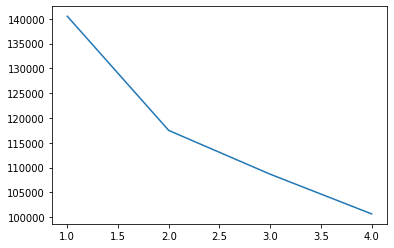

In [9]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [10]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 108672.0


In [11]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [12]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [13]:
combinedDf.head()

,age,job,marital,education,balance,housing,loan,cluster_predicted
0,50,management,married,tertiary,0,1,0,0
1,40,technician,single,secondary,0,1,0,0
2,30,entrepreneur,married,secondary,0,1,1,0
3,40,blue-collar,married,other,0,1,0,0
4,30,other,single,other,0,0,0,1


In [14]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [50]:
df = pd.concat([combinedDf, data_y], axis = 1).reset_index()
df_excel = pd.DataFrame(df)
df_excel.to_excel("df3clusters.xlsx", index=False)

In [52]:
df_excel

,index,age,job,marital,education,balance,housing,loan,cluster_predicted,y
0,0,50,management,married,tertiary,0,1,0,0,0
1,1,40,technician,single,secondary,0,1,0,0,0
2,2,30,entrepreneur,married,secondary,0,1,1,0,0
3,3,40,blue-collar,married,other,0,1,0,0,0
4,4,30,other,single,other,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
45185,45185,50,technician,married,tertiary,0,0,0,2,1
45186,45186,60,retired,divorced,primary,0,0,0,2,1
45187,45187,60,retired,married,secondary,2,0,0,0,1
45188,45188,50,blue-collar,married,secondary,0,0,0,0,0


In [16]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = km_cao.labels_

In [17]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
4,4,1
6,6,1
7,7,1
16,16,1
26,26,1
...,...,...
45175,45175,1
45177,45177,1
45180,45180,1
45182,45182,1


In [18]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
5,5,0
...,...,...
45181,45181,0
45183,45183,0
45187,45187,0
45188,45188,0


In [19]:
y = df['cluster_predicted'].value_counts()

In [20]:
y

0    27620
1    11440
2     6130
Name: cluster_predicted, dtype: int64

In [21]:
new = pd.DataFrame(combinedDf)
new.to_excel("combinedf.xlsx", index=False)

In [22]:
new

,age,job,marital,education,balance,housing,loan,cluster_predicted
0,50,management,married,tertiary,0,1,0,0
1,40,technician,single,secondary,0,1,0,0
2,30,entrepreneur,married,secondary,0,1,1,0
3,40,blue-collar,married,other,0,1,0,0
4,30,other,single,other,0,0,0,1
...,...,...,...,...,...,...,...,...
45185,50,technician,married,tertiary,0,0,0,2
45186,60,retired,divorced,primary,0,0,0,2
45187,60,retired,married,secondary,2,0,0,0
45188,50,blue-collar,married,secondary,0,0,0,0


In [23]:
df["marital"].value_counts()

married     27203
single      12780
divorced     5207
Name: marital, dtype: int64

In [24]:
df['marital'].value_counts().idxmax()

'married'

In [25]:
df.loc[(df['cluster_predicted'] == 0)]

,index,age,job,marital,education,balance,housing,loan,cluster_predicted,y
0,0,50,management,married,tertiary,0,1,0,0,0
1,1,40,technician,single,secondary,0,1,0,0,0
2,2,30,entrepreneur,married,secondary,0,1,1,0,0
3,3,40,blue-collar,married,other,0,1,0,0,0
5,5,30,management,married,tertiary,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45181,45181,30,admin.,single,secondary,0,0,0,0,1
45183,45183,60,retired,married,secondary,1,0,0,0,1
45187,45187,60,retired,married,secondary,2,0,0,0,1
45188,45188,50,blue-collar,married,secondary,0,0,0,0,0


In [26]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6130 entries, 8 to 45186
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                6130 non-null   int64 
 1   job                6130 non-null   object
 2   marital            6130 non-null   object
 3   education          6130 non-null   object
 4   balance            6130 non-null   int64 
 5   housing            6130 non-null   int64 
 6   loan               6130 non-null   int64 
 7   cluster_predicted  6130 non-null   uint16
dtypes: int64(4), object(3), uint16(1)
memory usage: 395.1+ KB


In [117]:
df0 = df[df.cluster_predicted == 0]
dataf0 = pd.DataFrame(df0)
dataf0.to_excel("dataf0.xlsx", index=False)
#df0 = df[df.cluster_predicted != 2]

In [28]:
print(df0['age'].value_counts().idxmax())
print(df0['job'].value_counts().idxmax())
print(df0['marital'].value_counts().idxmax())
print(df0['education'].value_counts().idxmax())
print(df0['balance'].value_counts().idxmax())
print(df0['housing'].value_counts().idxmax())
print(df0['loan'].value_counts().idxmax())
print(df0['y'].value_counts().idxmax())

30
blue-collar
married
secondary
0
1
0
0


In [121]:
data0 ={'Idade': [df0['age'].value_counts().idxmax()],
'Profissão': [df0['job'].value_counts().idxmax()],
'Estado civil': [df0['marital'].value_counts().idxmax()],
'Educação': [df0['education'].value_counts().idxmax()],
'Balanço': [df0['balance'].value_counts().idxmax()],
'Crédito habitação': [df0['housing'].value_counts().idxmax()],
'Empréstmo': [df0['loan'].value_counts().idxmax()],
'Resultado': [df0['y'].value_counts().idxmax()]
}
clusters0 = pd.DataFrame(data0)
clusters0
clusters0.to_excel("cluster0.xlsx", index=False)  

In [29]:
df0.loc[(df0['cluster_predicted'] == 2)]

,index,age,job,marital,education,balance,housing,loan,cluster_predicted,y


In [119]:
df1 = df[df.cluster_predicted == 1]
dataf1 = pd.DataFrame(df1)
dataf1.to_excel("dataf1.xlsx", index=False)

In [31]:
print(df1['age'].value_counts().idxmax())
print(df1['job'].value_counts().idxmax())
print(df1['marital'].value_counts().idxmax())
print(df1['education'].value_counts().idxmax())
print(df1['balance'].value_counts().idxmax())
print(df1['housing'].value_counts().idxmax())
print(df1['loan'].value_counts().idxmax())
print(df1['y'].value_counts().idxmax())

40
management
single
tertiary
0
0
0
0


In [122]:
data1 ={'Idade': [df1['age'].value_counts().idxmax()],
'Profissão': [df1['job'].value_counts().idxmax()],
'Estado civil': [df1['marital'].value_counts().idxmax()],
'Educação': [df1['education'].value_counts().idxmax()],
'Balanço': [df1['balance'].value_counts().idxmax()],
'Crédito habitação': [df1['housing'].value_counts().idxmax()],
'Empréstmo': [df1['loan'].value_counts().idxmax()],
'Resultado': [df1['y'].value_counts().idxmax()]
}
clusters1 = pd.DataFrame(data1)
clusters1
clusters1.to_excel("cluster1.xlsx", index=False)  

In [116]:
clusters1

,Idade,Profissão,Estado civil,Educação,Balanço,Crédito habitação,Empréstmo
0,40,management,single,tertiary,0,0,0


In [120]:
df2 = df[df.cluster_predicted == 2]
dataf2 = pd.DataFrame(df2)
dataf2.to_excel("dataf2.xlsx", index=False)

cluster2 = []
cluster2.append(df2['age'].value_counts().idxmax()),cluster2.append(df2['job'].value_counts().idxmax()),
cluster2.append(df2['marital'].value_counts().idxmax()),
cluster2.append(df2['education'].value_counts().idxmax()),
cluster2.append(df2['balance'].value_counts().idxmax()),
cluster2.append(df2['housing'].value_counts().idxmax()),
cluster2.append(df2['loan'].value_counts().idxmax())
#pd.DataFrame(cluster2, columns=('Idade','Profissão', 'Estado civil', 'Educação', 'Balanço', 'Crédito habitação', 'Empréstmo'))

In [101]:
cluster2

[50, 'technician', 'married', 'primary', 0, 0, 0]

In [33]:
print(df2['age'].value_counts().idxmax())
print(df2['job'].value_counts().idxmax())
print(df2['marital'].value_counts().idxmax())
print(df2['education'].value_counts().idxmax())
print(df2['balance'].value_counts().idxmax())
print(df2['housing'].value_counts().idxmax())
print(df2['loan'].value_counts().idxmax())
print(df2['y'].value_counts().idxmax())

50
technician
married
primary
0
0
0
0


In [123]:
data2 ={'Idade': [df2['age'].value_counts().idxmax()],
'Profissão': [df2['job'].value_counts().idxmax()],
'Estado civil': [df2['marital'].value_counts().idxmax()],
'Educação': [df2['education'].value_counts().idxmax()],
'Balanço': [df2['balance'].value_counts().idxmax()],
'Crédito habitação': [df2['housing'].value_counts().idxmax()],
'Empréstmo': [df2['loan'].value_counts().idxmax()],
'Resultado': [df2['y'].value_counts().idxmax()]
}
clusters2 = pd.DataFrame(data2)
clusters2
clusters2.to_excel("cluster2.xlsx", index=False)  

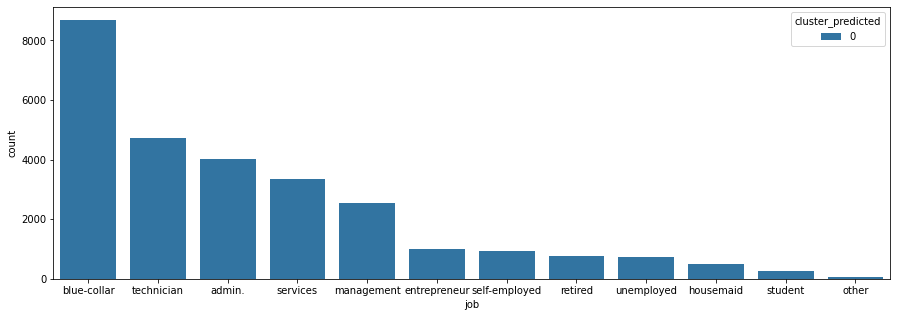

In [46]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df0['job'],order=df0['job'].value_counts().index,hue=df0['cluster_predicted'])
plt.show()

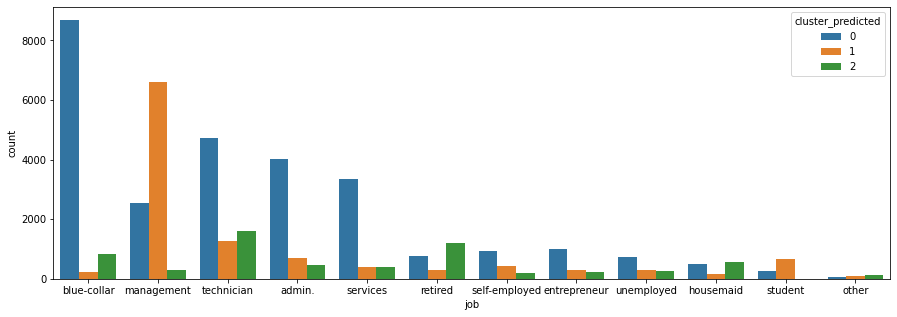

In [44]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

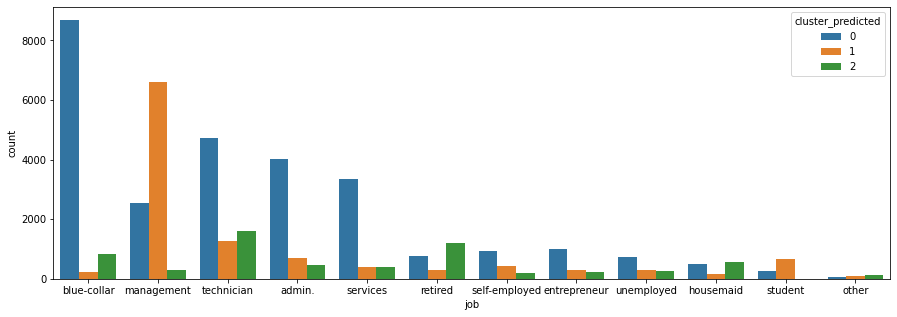

In [34]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

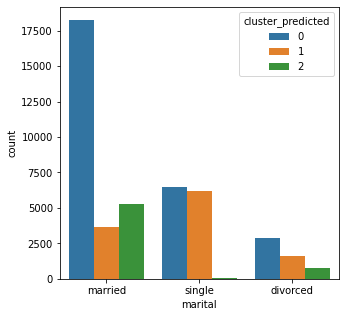

In [35]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

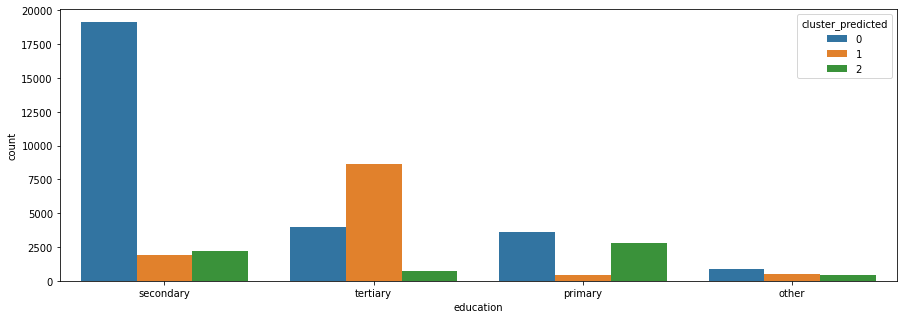

In [36]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

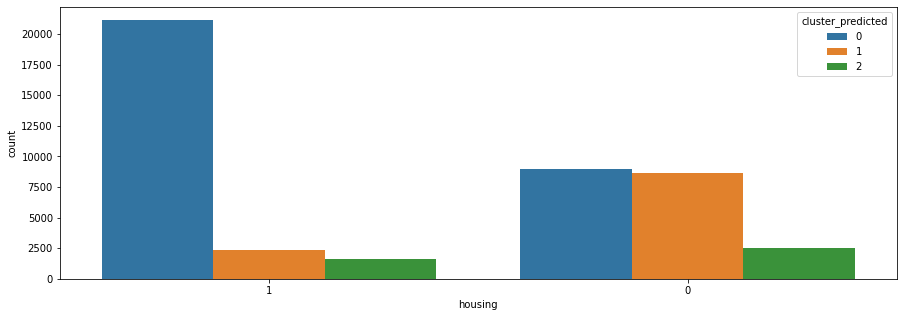

In [44]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

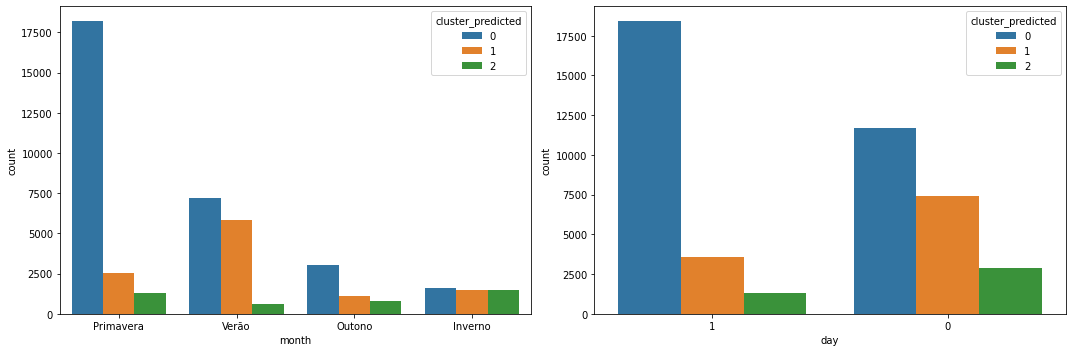

In [21]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day'],order=combinedDf['day'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [22]:
clustering = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Jupyter Notebook/Data Transformation/bank-full-transformed.csv')

from sklearn.cluster import KMeans

le = LabelEncoder() 
  
clustering['job']= le.fit_transform(clustering['job']) 
clustering['marital']= le.fit_transform(clustering['marital']) 
clustering['education']= le.fit_transform(clustering['education']) 
clustering['month']= le.fit_transform(clustering['month']) 


print(clustering)

kmeans = KMeans(n_clusters=4)

kmeans.fit(clustering)

clusters = kmeans.cluster_centers_
clusters

y_km = kmeans.fit_predict(clustering)
y_km

clustersDframe = pd.DataFrame(y_km)
clustersDframe.columns = ['cluster_predicted']
combinedDframe = pd.concat([clustering, clustersDframe], axis = 1).reset_index()

cluster_0 = clustering[combinedDframe['cluster_predicted'] == 0]
cluster_1 = clustering[combinedDframe['cluster_predicted'] == 1]
cluster_2 = clustering[combinedDframe['cluster_predicted'] == 2]
cluster_3 = clustering[combinedDframe['cluster_predicted'] == 3]

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDframe['job'],order=combinedDframe['job'].value_counts().index,hue=combinedDframe['cluster_predicted'])
plt.show()

plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDframe['marital'],order=combinedDframe['marital'].value_counts().index,hue=combinedDframe['cluster_predicted'])
plt.show()

kmeans = KMeans(n_clusters = 2)

kmeans.fit(data.drop('y', inplace = False, axis = 1))

kmeans.cluster_centers_

def converter(cluster):
    if cluster == 'Yes':
        return 1
    if cluster == 'No':
        return 0

data['Cluster']=data['y'].apply(converter)

data.loc[(data['Cluster'] == 1)]

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(data['Cluster'], kmeans.labels_))
print('\n')
print(classification_report(data['Cluster'], kmeans.labels_))

X = np.array(data)

import random
init_centroids = random.sample(range(0, len(data)), 3)
init_centroids

centroids = []
for i in init_centroids:
    centroids.append(data.loc[i])
centroids

centroids = np.array(centroids)

centroids

def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

get_centroids = findClosestCentroids(centroids, X)

def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

plt.subplots(figsize = (15,5))
sns.countplot(x=data['job'], order=data['job'].value_counts().index, hue=data['Cluster'])
plt.show()